### O objetivo deste modelo é prever o preço do bitcoin no dia seguinte

In [73]:
#fazendo o import das bibliotecas necessárias
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [45]:
#fazendo o import dos dados
df = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')

C:\Users\Felipe\AppData\Local\Temp\ipykernel_17400\3143094843.py:2: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


In [46]:
#verificando o dataframe
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#tem 148 colunas nesse dataframe, podemos excluir algumas delas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Columns: 148 entries, time to principal_market_usd
dtypes: float64(146), object(2)
memory usage: 6.3+ MB


In [48]:
#vamos criar a coluna de preco
#primeiro vamos listar os valores
list_precos = list(df['PriceUSD'])

#queremos que ele seja o preco do dia seguinte, entao a ideia e tirar o primeiro elemento e adicionar um 0 ao ultimo
#assim a lista vai 'avancar' 1 casa 

#remove o primeiro elemento
list_precos.pop(0)

#acrescenta 0 ao ultimo elemento
list_precos.append(0)

#adiciona a coluna de preco_proximo_dia ao df
df['preco_proximo_dia (dolar)'] = list_precos

In [49]:
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_proximo_dia (dolar)
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#vamos apagar os valores nulos nessas colunas, visto que tem muitos
df.dropna(subset=['PriceUSD','preco_proximo_dia (dolar)'],inplace=True)

In [51]:
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_proximo_dia (dolar)
561,2010-07-18,860.0,49287.0,52093.0,52190.0,199.0,51245.0,52190.0,54.0,51064.0,...,48.783737,4.187596,1.850,0.158804,1.820565,NaN,NaN,NaN,NaN,0.080800
562,2010-07-19,929.0,49297.0,52208.0,52311.0,207.0,51276.0,52311.0,54.0,51085.0,...,86.951152,7.025653,2.625,0.212100,1.828863,NaN,NaN,NaN,NaN,0.074736
563,2010-07-20,936.0,49367.0,52344.0,52456.0,213.0,51353.0,52456.0,54.0,51157.0,...,42.528835,3.178423,1.375,0.102762,1.831412,NaN,NaN,NaN,NaN,0.079193
564,2010-07-21,784.0,49382.0,52397.0,52521.0,220.0,51380.0,52521.0,54.0,51179.0,...,71.822334,5.687816,18.500,1.465068,1.833749,NaN,NaN,NaN,NaN,0.058470
565,2010-07-22,594.0,49504.0,52577.0,52715.0,222.0,51508.0,52715.0,57.0,51304.0,...,112.714622,6.590397,1.010,0.059054,1.840245,NaN,NaN,NaN,NaN,0.060593


In [52]:
#vamos apagar todas as colunas que tiverem mais de um valor nulo

#conta os valores nulos de cada coluna e armazena em uma lista
null_counts = df.isnull().sum()

print(null_counts)

time                             0
AdrActCnt                        0
AdrBal1in100KCnt                 0
AdrBal1in100MCnt                 0
AdrBal1in10BCnt                  0
                              ... 
VtyDayRet180d                  180
VtyDayRet30d                    30
principal_market_price_usd    4244
principal_market_usd          4244
preco_proximo_dia (dolar)        0
Length: 149, dtype: int64


In [53]:
#verifica quais colunas tem mais de um valor nulo e se tiver, armazena o nome dela em uma lista
colunas_apagar = null_counts[null_counts > 1].index.tolist()
colunas_apagar

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [54]:
#apaga as colunas
df.drop(colunas_apagar, axis=1, inplace=True)
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,preco_proximo_dia (dolar)
561,2010-07-18,860.0,49287.0,52093.0,52190.0,199.0,51245.0,52190.0,54.0,51064.0,...,0.002870,396.0,17180.55,1474.778412,48.783737,4.187596,1.850,0.158804,1.820565,0.080800
562,2010-07-19,929.0,49297.0,52208.0,52311.0,207.0,51276.0,52311.0,54.0,51085.0,...,0.003866,512.0,40243.73,3251.693384,86.951152,7.025653,2.625,0.212100,1.828863,0.074736
563,2010-07-20,936.0,49367.0,52344.0,52456.0,213.0,51353.0,52456.0,54.0,51157.0,...,0.004896,738.0,16063.23,1200.497201,42.528835,3.178423,1.375,0.102762,1.831412,0.079193
564,2010-07-21,784.0,49382.0,52397.0,52521.0,220.0,51380.0,52521.0,54.0,51179.0,...,0.002859,377.0,20834.15,1649.915979,71.822334,5.687816,18.500,1.465068,1.833749,0.058470
565,2010-07-22,594.0,49504.0,52577.0,52715.0,222.0,51508.0,52715.0,57.0,51304.0,...,0.002558,344.0,33049.03,1932.368865,112.714622,6.590397,1.010,0.059054,1.840245,0.060593


In [55]:
#vamos transformar a coluna time em colunas de ano, mes e dia

#transforma o tipo da coluna de string para datetime
df['time'] = pd.to_datetime(df['time'])

In [56]:
# Criar as colunas de data
df['ano'] = df['time'].dt.year
df['mes'] = df['time'].dt.month
df['dia'] = df['time'].dt.day
df['dia_semana'] =df['time'].dt.day_of_week
df['dia_ano'] =df['time'].dt.day_of_year

In [57]:
# Exclui a coluna de data da base
df.drop(['time'], axis = 1, inplace  = True)

In [58]:
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_proximo_dia (dolar)']
correlation_matrix

AdrActCnt           0.713367
AdrBal1in100KCnt   -0.083989
AdrBal1in100MCnt    0.737888
AdrBal1in10BCnt     0.801796
AdrBal1in10KCnt     0.379535
                      ...   
ano                 0.760129
mes                -0.042938
dia                -0.009182
dia_semana         -0.000526
dia_ano            -0.043931
Name: preco_proximo_dia (dolar), Length: 142, dtype: float64

In [59]:
# Identificar as colunas com pouca correlação ao preco_dia_seguinte
colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.3) & (correlation_matrix <= 0.3)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]
colunas_remover

['AdrBal1in100KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv10KCnt',
 'BlkCnt',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMedNtv',
 'FeeTotNtv',
 'FlowInExNtv',
 'FlowOutExNtv',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct30d',
 'SplyAct7d',
 'SplyAct90d',
 'SplyAdrBal1in1K',
 'SplyAdrBalNtv10K',
 'SplyAdrTop100',
 'TxTfrValAdjNtv',
 'TxTfrValMeanNtv',
 'TxTfrValMedNtv']

In [60]:
# Apagar as colunas com pouca correlação ao preco_dia_seguinte
df.drop(colunas_remover, axis=1, inplace = True)
df.shape

(4983, 114)

In [61]:
# Exclui todas as linhas que possuem ao menos 1 registro nulo
df.dropna(inplace=True)
df.shape

(4982, 114)

In [62]:
X = df.drop(['preco_proximo_dia (dolar)'], axis = 1)
y = df[['preco_proximo_dia (dolar)']]

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train, Y_train)

LinearRegression()

In [68]:
# Prever vendas para os dados de teste
y_pred = model.predict(x_test)

ValueError: x and y must be the same size

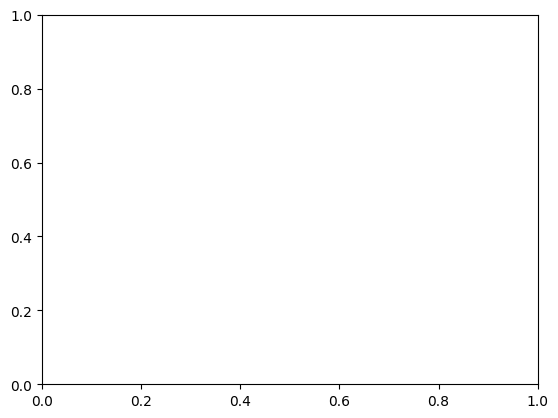

In [74]:
# Plotar os dados originais e a curva de regressão polinomial
plt.scatter(X_train, Y_train, color='blue', label='Dados Originais')
plt.scatter(x_test, y_pred, color='red', label='Previsões')
plt.xlabel('Investimento em TV (em $1000s)')
plt.ylabel('Receita de Vendas (em M$)')
plt.legend()
plt.title('Regressão Polinomial entre Investimento em TV e Receita de Vendas')
plt.show()